# Object recognition in images with CNN


In [31]:
import tensorflow as tf 
print(tf.__version__)

2.16.1


In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [33]:
# importing the dataset
from tensorflow.keras.datasets import cifar10

In [34]:
# loading the dataset
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [35]:
class_names=['0: airplane', '1: automobile','2: bird' ,'3: cat', '4: deer','5: dog','6: frog', '7: horse', '8: horse', '9: truck']

In [36]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: horse', '9: truck']


In [37]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [38]:
y_train.max(), y_train.min()

(9, 0)

In [39]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: horse',
 '9: truck']

In [40]:
# Normalizing the images
x_train=x_train / 255.0
x_test=x_test/255.0

In [41]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [42]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

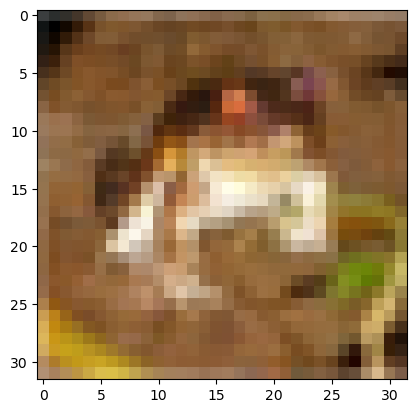

In [43]:
plt.imshow(x_train[0])

In [44]:
y_train[0]

array([6], dtype=uint8)

In [45]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: horse',
 '9: truck']

# Step 3: Building the CNN

In [46]:
# Defining the object 
model = tf.keras.models.Sequential()


In [47]:
# Adding first CNN layer
# 1) filters (kernel)=32
# 2) kernel size=3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape =(32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))

c:\Users\mekon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [48]:
# Adding second CNN layer and maxpool layer

# 1) filters (kernel)=32
# 2) kernel size=3
# 3) padding = same
# 4) activation = ReLU
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same', activation='relu'))

#maxpool layer parameters,
# 1) pool size =2
# 2) strides = 2
# 3) padding=valid


model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [51]:
# Adding third CNN layer
# 1) filters (kernel)=32
# 2) kernel size=3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

#maxpool layer parameters,
# 1) pool size =2
# 2) strides = 2
# 3) padding=valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


In [52]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))


In [53]:
# Adding the Flatterning layer
model.add(tf.keras.layers.Flatten())

In [55]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [56]:
# Adding the second layer(output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

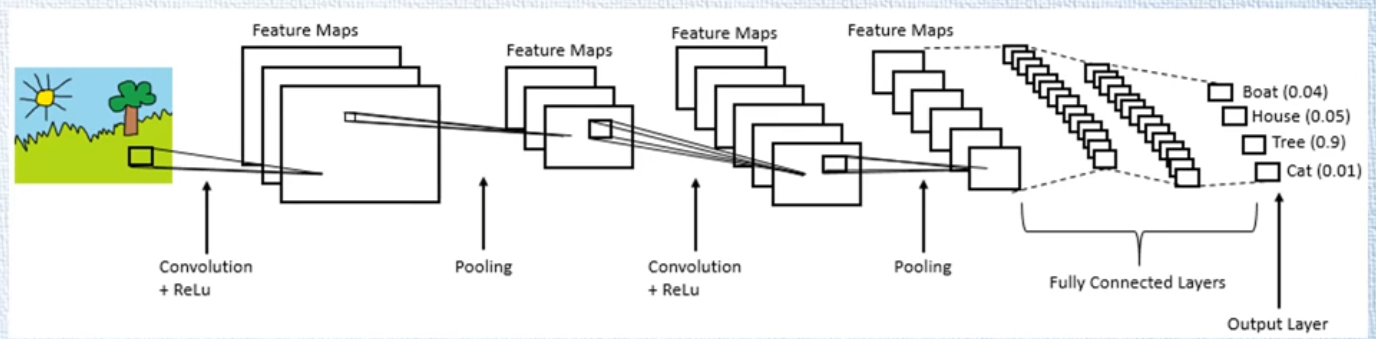

# Step 4 : Training the model 

In [63]:
# Compiling the model
from keras.losses import sparse_categorical_crossentropy

model.compile(loss=sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [64]:

model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 135s 26ms/step - accuracy: 0.3946 - loss: 1.6557
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 144s 29ms/step - accuracy: 0.6488 - loss: 0.9937
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 129s 26ms/step - accuracy: 0.7047 - loss: 0.8282
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 182s 36ms/step - accuracy: 0.7461 - loss: 0.7295
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 135s 27ms/step - accuracy: 0.7705 - loss: 0.6576
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 116s 23ms/step - accuracy: 0.7906 - loss: 0.6009
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 117s 23ms/step - accuracy: 0.8069 - loss: 0.5514
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 114s 23ms/step - accuracy: 0.8122 - loss: 0.5315
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 114s 23ms/step - accuracy: 0.8269 - loss: 0.4930
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 113s 23ms/step - accuracy: 0.8370 - loss: 0.4638


# Step 5: Model evaluation and prediction


In [65]:
# evaluate the model performance
test_loss, test_acc= model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7440 - loss: 0.7754


In [66]:
print('Test Accuracy is : {}'.format(test_acc))

Test Accuracy is : 0.7430999875068665


In [68]:
# Predictions 
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [71]:
print(y_pred[0]), print(y_test[0])

3
[3]


(None, None)

In [73]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[790  15  38  38   9  14   6   7  53  30]
 [ 12 871   4  17   2   8   9   5  16  56]
 [ 72   5 564  91  98  82  50  22  13   3]
 [ 20   6  42 650  45 165  34  28   5   5]
 [ 23   2  51 102 688  52  34  43   2   3]
 [  6   1  27 196  26 689  16  36   2   1]
 [  5   1  31  84  43  58 766   8   4   0]
 [  7   1  23  61  50  70   2 782   1   3]
 [ 69  19  10  38   6   9   8   4 810  27]
 [ 28  68   7  30   1   6   2  18  19 821]]


In [74]:
acc_cm=accuracy_score(y_test, y_pred)
print(acc_cm)


0.7431
